In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

## Scatterplots

In [133]:
#df1

In [134]:
df_scatter = pd.DataFrame(index=df1.index)
df_scatter['SPY'] = df1['SPY']

In [135]:
df_scatter['SPY_dr'] = compute_daily_returns(df1['SPY'])

In [136]:
df_scatter['GLD'] = df1['GLD']
#df_scatter

In [137]:
df_scatter['GLD_dr'] = compute_daily_returns(df1['GLD'])
#df_scatter

In [138]:
df_scatter['IBM'] = df1['IBM']
df_scatter['IBM_dr'] = compute_daily_returns(df1['IBM'])
#df_scatter

In [139]:
#plt.scatter(x=df_scatter['SPY_dr'], y=df_scatter['GLD_dr'], s=5)
#plt.xlabel("SPY Daily Returns")
#plt.ylabel("GLD Daily Returns")

slope, beta:  0.7768105798558744 , y-intercept, alpha:  0.0001150243634594643


Text(0, 0.5, 'IBM Daily Returns')

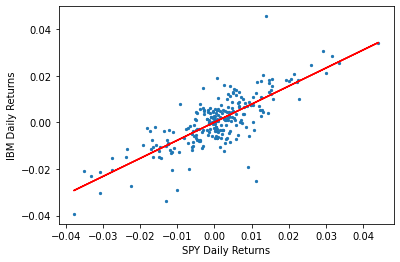

In [140]:
plt.scatter(x=df_scatter['SPY_dr'], y=df_scatter['IBM_dr'], s=5)

#beta_IBM, alpha_IBM = np.polynomial.polynomial.Polynomial.fit(df_scatter['SPY_dr'], df_scatter['IBM_dr'],1)
beta_IBM, alpha_IBM = np.polyfit(df_scatter['SPY_dr'], df_scatter['IBM_dr'],1)
print('slope, beta: ',beta_IBM, ', y-intercept, alpha: ' ,alpha_IBM)

plt.plot(df_scatter['SPY_dr'], beta_IBM*df_scatter['SPY_dr'] + alpha_IBM, '-', color='r')

plt.xlabel("SPY Daily Returns")
plt.ylabel("IBM Daily Returns")

In [141]:
print(df_scatter.corr(method='pearson'))

             SPY    SPY_dr       GLD    GLD_dr       IBM    IBM_dr
SPY     1.000000  0.143994  0.587667  0.064607  0.830918  0.135199
SPY_dr  0.143994  1.000000  0.052076  0.186384  0.100571  0.781875
GLD     0.587667  0.052076  1.000000  0.099879  0.870330  0.073993
GLD_dr  0.064607  0.186384  0.099879  1.000000  0.032394  0.153024
IBM     0.830918  0.100571  0.870330  0.032394  1.000000  0.134146
IBM_dr  0.135199  0.781875  0.073993  0.153024  0.134146  1.000000


## Histograms

In [81]:
df_histo = pd.read_csv("csv_data/SPY.csv", index_col = "Date", 
                    parse_dates=True, usecols = ['Date','Adj Close'],
                    na_values=['nan']) 

In [82]:
def compute_daily_returns(big_df):
    # Compute daily returns of stock data
    daily_returns = big_df.copy()
    daily_returns[1:] = (big_df[1:] / big_df[:-1].values) - 1
    daily_returns.iloc[0] = 0
    return daily_returns

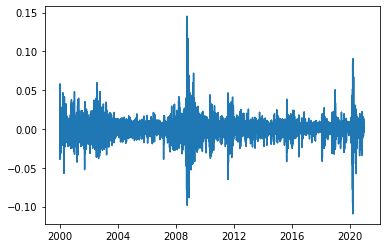

In [83]:
my_daily_returns = compute_daily_returns(df_histo)
plt.plot(my_daily_returns)

In [84]:
mean_spy_dr = my_daily_returns.mean()
print(mean_spy_dr)
std_spy_dr  = my_daily_returns.std()
print(std_spy_dr)

Adj Close    0.000331
dtype: float64
Adj Close    0.012533
dtype: float64


0
0


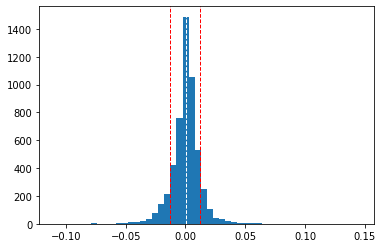

In [85]:
plt.hist(my_daily_returns, bins = 50)
print(int(mean_spy_dr))
plt.axvline(float(mean_spy_dr), color='w', linestyle='dashed', linewidth = 1)
print(int(std_spy_dr))
plt.axvline(float(std_spy_dr), color='r', linestyle='dashed', linewidth = 1)
plt.axvline(float(-std_spy_dr), color='r', linestyle='dashed', linewidth = 1)
plt.show()

In [86]:
print(my_daily_returns.kurtosis())

Adj Close    12.237061
dtype: float64


## Incomplete Data - Back Filling - Forward Filling

In [87]:
df_fake2 = pd.read_csv("csv_data/FAKE2.csv", index_col = "Date", 
                    parse_dates=True, usecols = ['Date','Adj Close'],
                    na_values=['nan']) 

Text(0.5, 1.0, 'Incomplete data of FAKE2')

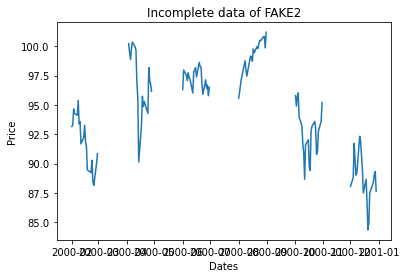

In [88]:
plt.plot(df_fake2)
plt.xlabel("Dates")
plt.ylabel("Price")
plt.title("Incomplete data of FAKE2")

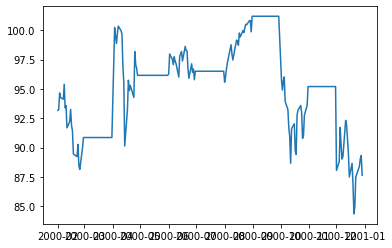

In [89]:
df_fake2.fillna(method='ffill', inplace=True)
plt.plot(df_fake2)

## Computing rolling statistics

In [90]:
df_spy = pd.DataFrame(index=df1.index)
df_spy_data = df1['SPY']
df_spy['SPY'] = df_spy_data
df_spy

NameError: name 'df1' is not defined

In [91]:
plt.plot(df_spy['SPY'])
plt.title("SPY Rolling Mean")
plt.xlabel('Time')
plt.ylabel('Price')

NameError: name 'df_spy' is not defined

In [92]:
rm_df_spy = df_spy['SPY'].rolling(20).mean()
rm_df_spy

NameError: name 'df_spy' is not defined

In [93]:
df_spy['SPY_rm'] = rm_df_spy
df_spy.dropna()

NameError: name 'rm_df_spy' is not defined

In [94]:
plt.plot(df_spy, label = df_spy.columns)
plt.legend(loc='upper right')

NameError: name 'df_spy' is not defined

## Global Statistics

In [95]:
#df1

In [96]:
df1.mean()

NameError: name 'df1' is not defined

In [97]:
df1.median()

NameError: name 'df1' is not defined

In [98]:
df1.std()

NameError: name 'df1' is not defined

## Arithmetic Operations

In [99]:
np.random.seed(500)
my_arr_6 = np.random.randint(1,15, size = (2,3))
print(my_arr_6)
my_arr_7 = np.random.randint(10,20, size = (3,2))
print(my_arr_7)
print(np.dot(my_arr_6, my_arr_7, out=None))

[[11  8  2]
 [ 2 14  9]]
[[17 11]
 [11 15]
 [19 12]]
[[313 265]
 [359 340]]


In [100]:
np.random.seed(850)
my_arr_4 = np.random.randint(1,10, size = (5,3))
print(my_arr_4)
my_arr_5 = np.random.randint(1,5, size = (5,3))
print(my_arr_5)
print(my_arr_4 * my_arr_5)

[[5 1 1]
 [1 7 3]
 [6 6 3]
 [8 5 6]
 [4 9 5]]
[[1 3 3]
 [4 3 1]
 [4 1 1]
 [4 3 4]
 [3 3 1]]
[[ 5  3  3]
 [ 4 21  3]
 [24  6  3]
 [32 15 24]
 [12 27  5]]


In [101]:
np.random.seed(100)
my_arr_3 = np.random.randint(10,50, size = (4,3))
print(my_arr_3)
print(my_arr_3 / 2)

[[18 34 13]
 [49 33 25]
 [20 40 44]
 [12 44 24]]
[[ 9.  17.   6.5]
 [24.5 16.5 12.5]
 [10.  20.  22. ]
 [ 6.  22.  12. ]]


## Boolean or Mask index array

In [102]:
np.random.seed(543)
my_arr_2 = np.random.randint(1,25,size=(8,2))
print(my_arr_2)
my_arr_2_mean = my_arr_2.mean()
print("Mean: ", my_arr_2_mean)

[[ 8 18]
 [ 5 10]
 [15  7]
 [15 24]
 [21 17]
 [13 10]
 [12 14]
 [ 6 13]]
Mean:  13.0


In [103]:
my_arr_2[my_arr_2 < my_arr_2_mean] = my_arr_2_mean
my_arr_2

array([[13, 18],
       [13, 13],
       [15, 13],
       [15, 24],
       [21, 17],
       [13, 13],
       [13, 14],
       [13, 13]])

## Working with ndarrays

In [104]:
my_array_1 = np.random.rand(5)
print(my_array_1)
indices = np.array([1,1,2,3])
print(my_array_1[indices])

[0.17654448 0.33682062 0.17328738 0.89505449 0.93584041]
[0.33682062 0.33682062 0.17328738 0.89505449]


In [105]:
an_array = np.random.randint(0,25, size = (5,4))
an_array

array([[ 3,  9,  8, 12],
       [ 0,  3, 19, 23],
       [23,  4, 18, 14],
       [15, 16,  9, 24],
       [ 2, 16,  4, 17]])

In [106]:
an_array[0,0] = 1
an_array

array([[ 1,  9,  8, 12],
       [ 0,  3, 19, 23],
       [23,  4, 18, 14],
       [15, 16,  9, 24],
       [ 2, 16,  4, 17]])

## How fast is NumPy?

In [107]:
# Creating BIG array
my_big_array = np.random.randint(0,25, size =(1000,10000))

In [108]:
# Compute mean of array elements manually by iteration
def manual_mean(big_arr):
    sum = 0
    for i in range(big_arr.shape[0]):
        for j in range(big_arr.shape[1]):
            sum += big_arr[i,j]
    print("Manual Mean: ", (sum / big_arr.size))

In [109]:
manual_mean(my_big_array)

Manual Mean:  12.008424


In [110]:
# Compute mean of array elements by use of NumPy function
def numpy_mean(big_arr):
    print("NumPy Mean: ",big_arr.mean())

In [111]:
numpy_mean(my_big_array)

NumPy Mean:  12.008424


In [112]:
# Compare times taken to compute means
t1 = time.time()
manual_mean(my_big_array)
t2 = time.time()
d1 = t2 - t1
print("Manual computation took: {}".format(d1))

t3 = time.time()
numpy_mean(my_big_array)
t4 = time.time()
d2 = t4-t3
print("NumPy mean took: {}".format(d2))

print("\nDifference is of value: {}".format(d1/d2))

Manual Mean:  12.008424
Manual computation took: 2.2831852436065674
NumPy Mean:  12.008424
NumPy mean took: 0.01312875747680664

Difference is of value: 173.9071841063451


## Time function

In [113]:
## Timing functions
t1 = time.time()
print("Fuck you :D ")
t2 = time.time()
print("Prnt operation took: ", t2-t1)

Fuck you :D 
Prnt operation took:  0.000217437744140625


## operations on ndarrays

In [114]:
np.random.seed(543)
my_a = np.random.randint(0,25, size=(5,3))
print("My Array :\n",my_a)

My Array :
 [[ 7 17  4]
 [ 9 14  6]
 [14 23 20]
 [16 12  9]
 [11 13  5]]


In [115]:
print("Sum of all elements:\n",my_a.sum())

Sum of all elements:
 180


In [116]:
print(my_a.sum(axis=0))

[57 79 44]


In [117]:
print(my_a.sum(axis=1))

[28 29 57 37 29]


In [118]:
print(my_a.min(axis=1))

[ 4  6 14  9  5]


In [119]:
print(my_a.mean())

12.0


## Create arrays

In [120]:
np.empty(5)

array([2.0e-323, 3.0e-323, 6.9e-323, 4.4e-323, 2.5e-323])

In [121]:
np.empty((4,3))

array([[ 9. , 17. ,  6.5],
       [24.5, 16.5, 12.5],
       [10. , 20. , 22. ],
       [ 6. , 22. , 12. ]])

In [122]:
np.empty((4,3,5))

array([[[1.2875319e-316, 0.0000000e+000, 6.6353016e-321, 2.5296161e-321,
         6.6353016e-321],
        [2.2727020e-321, 5.7163395e-321, 2.2727020e-321, 5.7163395e-321,
         1.5069002e-321],
        [5.7805681e-321, 1.5266628e-321, 5.9139658e-321, 1.5513661e-321,
         5.9781943e-321]],

       [[1.5513661e-321, 6.3586249e-321, 1.5513661e-321, 6.7983433e-321,
         1.1314103e-321],
        [6.7983433e-321, 7.7568306e-322, 6.7983433e-321, 4.1007449e-322,
         6.3388622e-321],
        [0.0000000e+000, 5.9189064e-321, 0.0000000e+000, 5.7756274e-321,
         0.0000000e+000]],

       [[5.4742474e-321, 4.9406565e-323, 5.3161463e-321, 9.8813129e-323,
         5.3161463e-321],
        [4.0513383e-322, 5.4544847e-321, 3.3102398e-322, 5.7509241e-321,
         2.5691414e-322],
        [5.9189064e-321, 2.5691414e-322, 6.1857019e-321, 2.5691414e-322,
         6.4969632e-321]],

       [[5.3359090e-322, 6.4969632e-321, 7.7568306e-322, 6.4969632e-321,
         1.0177752e-321],
    

In [123]:
np.ones((4,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [124]:
np.random.normal(size = (3,2))

array([[-0.23828185,  0.26557052],
       [-1.00288868, -0.50090123],
       [ 0.26795362, -2.63167315]])

In [125]:
np.random.normal(50,10,size=(5,3))

array([[34.23523257, 41.88401046, 59.3317586 ],
       [54.08129638, 52.12817226, 41.87580082],
       [53.8807991 , 70.78692409, 69.72444069],
       [53.02046499, 39.69530221, 65.5421997 ],
       [57.66415275, 68.0844514 , 31.08594483]])

In [126]:
a = np.random.randint(0,10,size=(5,3))

In [127]:
a.shape

(5, 3)

## NumPy array access and slicing

In [128]:
nd1 = np.random.rand(8,5)
#nd1

In [129]:
nd1[-1,1:4]

array([0.1825644 , 0.97734329, 0.15265694])

## Normalising and plotting multiple columns

In [130]:
df_normalised = df1 / df1.loc['2010-01-04',:]

NameError: name 'df1' is not defined

In [ ]:
#df_normalised

In [ ]:
symbols = ['SPY','IBM','GOOG', 'GLD']

for symbol in symbols:
    plt.plot(df_normalised[symbol], label=symbol)

plt.title("Stock Prices")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()


## Plotting multiple column data

In [ ]:
# Plot stock prices

symbols = ['SPY','IBM','GOOG', 'GLD']

for symbol in symbols:
    plt.plot(df1[symbol], label=symbol)

plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()


## join multiple dataframes, ensuring dates match each other

In [132]:
# Define date range
start_date = '2010-01-01'
end_date = '2010-12-31'
dates = pd.date_range(start_date,end_date)
    
# Create an empty dataframe
df1 = pd.DataFrame(index = dates)
    
# Read SPY data into temporary dataframe   
dfSPY = pd.read_csv("csv_data/SPY.csv", index_col = "Date", 
                    parse_dates=True, usecols = ['Date','Adj Close'],
                    na_values=['nan'])                  
    
# Rename 'Adj Close' column to 'SPY' to prevent clash   
dfSPY = dfSPY.rename(columns={'Adj Close':'SPY'})
    
# Join the two DataFrames using DataFrame.join()
df1 = df1.join(dfSPY, how = 'inner')
    
# Drop the NaN values
df1 = df1.dropna()

# Read more stocks
symbols = ['AAPL', 'EUR=X', 'GLD', 'GOOG', 'IBM']
for symbol in symbols:
    df_temp = pd.read_csv("csv_data/{}.csv".format(symbol), index_col = "Date", 
                    parse_dates=True, usecols = ['Date','Adj Close'],
                    na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close' : symbol})
    df1 = df1.join(df_temp) # use default how='left'
    
#print(df1)

In [ ]:
#df1.loc['2010-01-01' : '2010-01-31']

In [ ]:
#df1.loc['2010-01-01' : '2010-01-31', ['SPY','IBM']]

## Read csv file

In [131]:
df = pd.read_csv("csv_data/SPY.csv")
#df

## Find max close value

In [66]:
def get_max_close(symbol):
    df = pd.read_csv("csv_data/{}.csv".format(symbol))
    return df['Close'].max()

In [67]:
get_max_close('SPY')

372.23999

## plot values of Apple stock

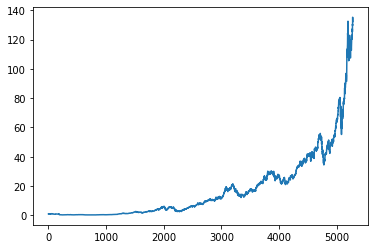

In [68]:
df = pd.read_csv("csv_data/AAPL.csv")
df['Adj Close']
plt.plot(df['Adj Close'])

## plot Close and Adj Close values

In [69]:
df = pd.read_csv("csv_data/AAPL.csv")
#df

In [70]:
df_1 = df[['Close','Adj Close']]

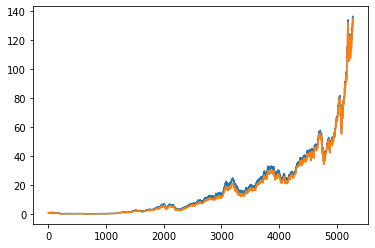

In [71]:
plt.plot(df[['Close' , 'Adj Close']])